In [1]:
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.stats.multicomp as mc
from matplotlib import pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
%matplotlib inline 
import statsmodels
pd.options.display.max_columns = None #show all columns in data

In [2]:
url = "https://raw.githubusercontent.com/shionguha/inf2178-expdesignfordatascience-w23/main/project%20dataset/Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv"
df = pd.read_csv(url, delimiter = ",")
df

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65271,2021,Oct-Dec,1055609,6044336.0,316123,Indigenous,F,Aged 25 to 34 years,Not a youth,XX,0,0,Vehicle Related,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,65272
65272,2021,Oct-Dec,1032758,6031692.0,307736,South Asian,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,65273
65273,2021,Oct-Dec,1021067,6064396.0,324057,White,F,Aged 45 to 54 years,Not a youth,XX,0,0,Assault,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,65274
65274,2021,Oct-Dec,1008998,6008662.0,331870,Unknown or Legacy,M,Aged 17 years and under,Youth (aged 17 years and under),XX,0,0,Robbery/Theft,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,65275


In [3]:
# Check the data type of each column:

df.dtypes

Arrest_Year                          int64
Arrest_Month                        object
EventID                              int64
ArrestID                           float64
PersonID                             int64
Perceived_Race                      object
Sex                                 object
Age_group__at_arrest_               object
Youth_at_arrest__under_18_years     object
ArrestLocDiv                        object
StripSearch                          int64
Booked                               int64
Occurrence_Category                 object
Actions_at_arrest___Concealed_i      int64
Actions_at_arrest___Combative__      int64
Actions_at_arrest___Resisted__d      int64
Actions_at_arrest___Mental_inst      int64
Actions_at_arrest___Assaulted_o      int64
Actions_at_arrest___Cooperative      int64
SearchReason_CauseInjury           float64
SearchReason_AssistEscape          float64
SearchReason_PossessWeapons        float64
SearchReason_PossessEvidence       float64
ItemsFound 

In [4]:
# There are some records where a person was strip searched, but the data does not indicate a booking.
# Hence, if StripSearch = 1, change Booked to 1 as well.

df.loc[df['StripSearch'] == 1, 'Booked'] = 1
df

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65271,2021,Oct-Dec,1055609,6044336.0,316123,Indigenous,F,Aged 25 to 34 years,Not a youth,XX,0,0,Vehicle Related,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,65272
65272,2021,Oct-Dec,1032758,6031692.0,307736,South Asian,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,65273
65273,2021,Oct-Dec,1021067,6064396.0,324057,White,F,Aged 45 to 54 years,Not a youth,XX,0,0,Assault,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,65274
65274,2021,Oct-Dec,1008998,6008662.0,331870,Unknown or Legacy,M,Aged 17 years and under,Youth (aged 17 years and under),XX,0,0,Robbery/Theft,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,65275


In [5]:
# Double check the data cleaning in the previous step:

if any((df['StripSearch'] == 1) & (df['Booked'] == 0)):
    print("There are rows where StripSearch is 1 and Booked is 0.")
else:
    print("There are no rows where StripSearch is 1 and Booked is 0.")

There are no rows where StripSearch is 1 and Booked is 0.


In [6]:
# Check the count of 0 and 1 in the Booked:

df["Booked"].value_counts()

1    34483
0    30793
Name: Booked, dtype: int64

# EDA

## Descriptive Statistics

### Frequency tables:

In [7]:
df['StripSearch'].value_counts()

0    57475
1     7801
Name: StripSearch, dtype: int64

In [8]:
# According to the result above, there is a huge gap between the number of people being strip searched and not
# So, I will focus on Booked instead since the counts are more even and the gap is much smaller.

In [9]:
# The columns I'm particularly interested in: Perceived_Race, Sex, Booked, Age_group__at_arrest_, 
# Youth_at_arrest__under_18_years, and SearchReason_PossessWeapons.
# Hence, I will focus on these columns for the descriptive statistics.

#### - Perceived_Race (with data cleaning)

In [10]:
df['Perceived_Race'].unique()

array(['White', 'Unknown or Legacy', 'Black', 'South Asian', 'Indigenous',
       'Middle-Eastern', 'Latino', 'East/Southeast Asian', nan],
      dtype=object)

In [11]:
# According to the previous step, there are NULL in race.
# Double check if there is any NULL:

print(df['Perceived_Race'].isnull().values.any()) 

True


In [12]:
# Replace NULL to 'Unknown or Legacy':

df['Perceived_Race'] = df['Perceived_Race'].fillna('Unknown or Legacy')

In [13]:
# Double check the data cleaning:

print(df['Perceived_Race'].isnull().values.any())

False


In [14]:
# Frequency table of Perceived_Race:

pd.DataFrame(df.Perceived_Race.value_counts())

,Perceived_Race
White,27723
Black,17526
Unknown or Legacy,5060
East/Southeast Asian,4415
South Asian,3613
Middle-Eastern,3237
Indigenous,1934
Latino,1768


#### - Sex (with data cleaning)

In [15]:
# Frequency table of Sex:

pd.DataFrame(df.Sex.value_counts())

,Sex
M,52650
F,12617
U,9


In [16]:
# From the frequency table above, "U" appears 9 times in Sex, which we treat as unknown.
# Data cleaning and remove the 9 rows:

df.drop(df[df['Sex'] == 'U'].index, inplace=True)
df["Sex"].value_counts()

M    52650
F    12617
Name: Sex, dtype: int64

#### - Youth_at_arrest__under_18_years (with data cleaning)

In [17]:
# Frequency table of Youth_at_arrest__under_18_years:

pd.DataFrame(df.Youth_at_arrest__under_18_years.value_counts())

,Youth_at_arrest__under_18_years
Not a youth,62225
Youth (aged 17 and younger),1681
Youth (aged 17 years and under),1361


In [18]:
# Since "aged 17 and younger" and "aged 17 years and under" are the same thing, replace one with "aged 17 and younger".
# Data cleaning:

df['Youth_at_arrest__under_18_years'] = df['Youth_at_arrest__under_18_years'].replace('Youth (aged 17 years and under)', 'Youth (aged 17 and younger)')

In [19]:
# Double check the data cleaning above:

df['Youth_at_arrest__under_18_years'].value_counts()

Not a youth                    62225
Youth (aged 17 and younger)     3042
Name: Youth_at_arrest__under_18_years, dtype: int64

#### Age_group__at_arrest_ (with data cleaning)

In [20]:
# Frequency table of Age_group__at_arrest_:

pd.DataFrame(df.Age_group__at_arrest_.value_counts())

,Age_group__at_arrest_
Aged 25 to 34 years,20945
Aged 35 to 44 years,16241
Aged 18 to 24 years,10039
Aged 45 to 54 years,9066
Aged 55 to 64 years,4588
Aged 17 years and younger,1681
Aged 17 years and under,1361
Aged 65 years and older,698
Aged 65 and older,624


In [21]:
# There are values that mean the same thing in the variable Age_group__at_arrest_.
# Data cleaning:

df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].str.replace('Aged 17 years and under', 'Aged 17 years and younger')
df['Age_group__at_arrest_'] = df['Age_group__at_arrest_'].str.replace('Aged 65 years and older', 'Aged 65 and older')

In [22]:
# Double check the data cleaning above:

df['Age_group__at_arrest_'].value_counts()

Aged 25 to 34 years          20945
Aged 35 to 44 years          16241
Aged 18 to 24 years          10039
Aged 45 to 54 years           9066
Aged 55 to 64 years           4588
Aged 17 years and younger     3042
Aged 65 and older             1322
Name: Age_group__at_arrest_, dtype: int64

#### - SearchReason_PossessWeapons

In [23]:
# Frequency table of SearchReason_PossessWeapons:

pd.DataFrame(df.SearchReason_PossessWeapons.value_counts())

,SearchReason_PossessWeapons
0.0,4264
1.0,3537


### Combination Graphs:

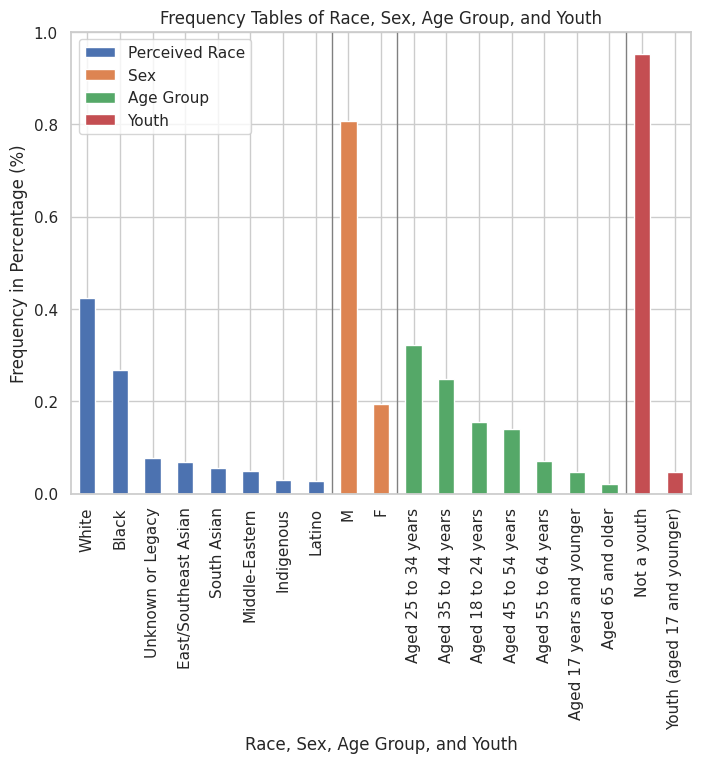

In [24]:
# Combined frequency table (Perceived_Race, Sex, Age_group__at_arrest_):

import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame with the frequency tables
freq_df = pd.concat([df['Perceived_Race'].value_counts(normalize=True), 
                     df['Sex'].value_counts(normalize=True), 
                     df['Age_group__at_arrest_'].value_counts(normalize=True), 
                     df['Youth_at_arrest__under_18_years'].value_counts(normalize=True)],
                     axis=1)
freq_df.columns = ['Perceived Race', 'Sex', 'Age Group', 'Youth']

# Plot the frequency tables as a stacked bar plot
sns.set(style='whitegrid')
ax = freq_df.plot(kind='bar', stacked=True, figsize=(8, 6))

# Set the plot labels and title
ax.set_xlabel('Race, Sex, Age Group, and Youth')
ax.set_ylabel('Frequency in Percentage (%)')
ax.set_title('Frequency Tables of Race, Sex, Age Group, and Youth')
ax.axvline(x=7.5, color='gray', linewidth=1)
ax.axvline(x=9.5, color='gray', linewidth=1)
ax.axvline(x=16.5, color='gray', linewidth=1)

# Show the plot
plt.show()

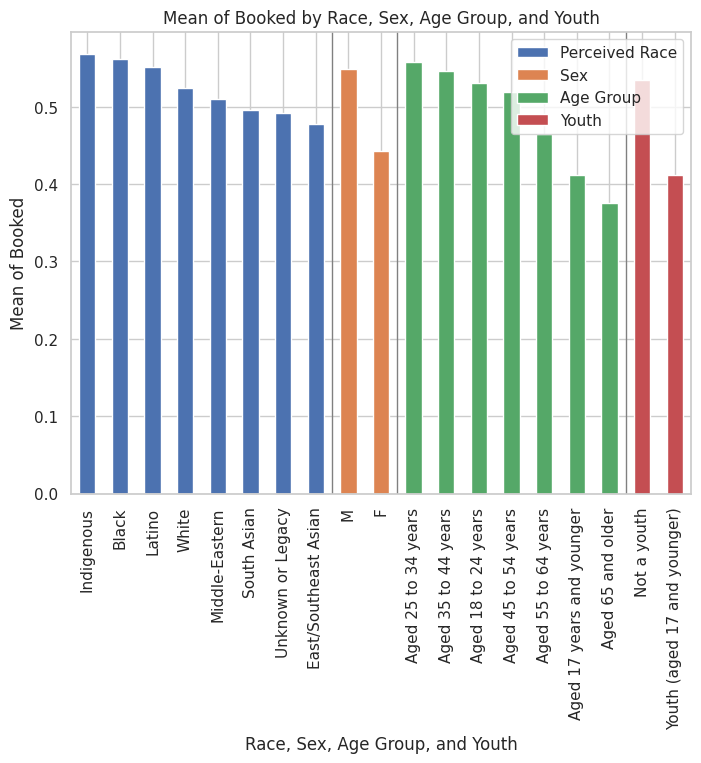

In [25]:
# Change the frequency to the sum of Booked:

# Create a DataFrame with the sum of 'Booked' column for each variable
freq_df = pd.concat([df.groupby('Perceived_Race')['Booked'].mean().sort_values(ascending=False), 
                     df.groupby('Sex')['Booked'].mean().sort_values(ascending=False), 
                     df.groupby('Age_group__at_arrest_')['Booked'].mean().sort_values(ascending=False), 
                     df.groupby('Youth_at_arrest__under_18_years')['Booked'].mean().sort_values(ascending=False)],
                     axis=1)
freq_df.columns = ['Perceived Race', 'Sex', 'Age Group', 'Youth']

# Plot the frequency tables as a stacked bar plot
sns.set(style='whitegrid')
ax = freq_df.plot(kind='bar', stacked=True, figsize=(8, 6))

# Set the plot labels and title
ax.set_xlabel('Race, Sex, Age Group, and Youth')
ax.set_ylabel('Mean of Booked')
ax.set_title('Mean of Booked by Race, Sex, Age Group, and Youth')
ax.axvline(x=7.5, color='gray', linewidth=1)
ax.axvline(x=9.5, color='gray', linewidth=1)
ax.axvline(x=16.5, color='gray', linewidth=1)

# Show the plot
plt.show()

### Contingency tables:

In [26]:
# Contingency table (Perceived_Race and Booked):

pd.crosstab(df['Perceived_Race'], df['Booked'])

Booked,0,1
Perceived_Race,,
Black,7691,9835
East/Southeast Asian,2305,2110
Indigenous,834,1100
Latino,793,974
Middle-Eastern,1588,1649
South Asian,1824,1789
Unknown or Legacy,2567,2490
White,13184,14534


In [27]:
# Contingency table (Sex and Booked):

pd.crosstab(df['Sex'], df['Booked'])

Booked,0,1
Sex,,
F,7035,5582
M,23751,28899


In [28]:
# Contingency table (Age_group__at_arrest_ and Booked):

pd.crosstab(df['Age_group__at_arrest_'], df['Booked'])

Booked,0,1
Age_group__at_arrest_,,
Aged 17 years and younger,1790,1252
Aged 18 to 24 years,4712,5327
Aged 25 to 34 years,9260,11685
Aged 35 to 44 years,7362,8879
Aged 45 to 54 years,4365,4701
Aged 55 to 64 years,2453,2135
Aged 65 and older,826,496


In [29]:
# Contingency table (Youth_at_arrest__under_18_years and Booked):

pd.crosstab(df['Youth_at_arrest__under_18_years'], df['Booked'])

Booked,0,1
Youth_at_arrest__under_18_years,,
Not a youth,28996,33229
Youth (aged 17 and younger),1790,1252


### Perceived_Race & SearchReason_PossessWeapons:

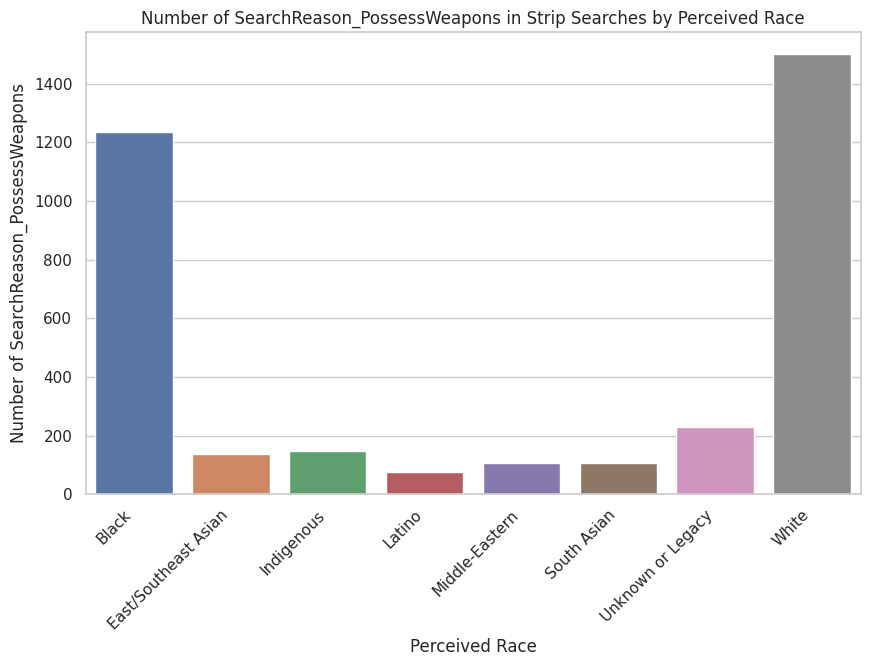

In [30]:
# Subset the data to only include records where StripSearch = 1
subset = df[df['StripSearch'] == 1]

# Group the data by race and sum the number of weapons found
grouped = subset.groupby('Perceived_Race')['SearchReason_PossessWeapons'].sum().reset_index()

# Create the bar plot
sns.set(style='whitegrid')
plt.figure(figsize=(10,6))
ax = sns.barplot(x='Perceived_Race', y='SearchReason_PossessWeapons', data=grouped)

# Rotate the x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Set the plot labels and title
ax.set_xlabel('Perceived Race')
ax.set_ylabel('Number of SearchReason_PossessWeapons')
ax.set_title('Number of SearchReason_PossessWeapons in Strip Searches by Perceived Race')

# Show the plot
plt.show()

## T-tests

#### Create a countinous variable:

In [31]:
# Create prob_Booked:

# Group the DataFrame by PersonID and Perceived_Race and calculate the sum of Booked
grouped = df.groupby(['PersonID', 'Perceived_Race'])['Booked'].sum().reset_index()

# Count the number of rows for each PersonID
booked_count = df.groupby('PersonID')['Booked'].count().reset_index()
booked_count.columns = ['PersonID', 'booked_count']

# Merge the two DataFrames
grouped = pd.merge(grouped, booked_count, on='PersonID')

# Calculate Y
grouped['prob_Booked'] = grouped['Booked'] / grouped['booked_count']

# Replace missing values with 0
grouped['prob_Booked'] = grouped['prob_Booked'].fillna(0)

# Merge Y back into the original DataFrame
df = pd.merge(df, grouped[['PersonID', 'Perceived_Race', 'prob_Booked']], on=['PersonID', 'Perceived_Race'], how='left')
df


,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId,prob_Booked
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1,0.666667
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2,0.666667
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3,0.333333
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4,0.000000
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65262,2021,Oct-Dec,1055609,6044336.0,316123,Indigenous,F,Aged 25 to 34 years,Not a youth,XX,0,0,Vehicle Related,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,65272,0.000000
65263,2021,Oct-Dec,1032758,6031692.0,307736,South Asian,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,65273,1.000000
65264,2021,Oct-Dec,1021067,6064396.0,324057,White,F,Aged 45 to 54 years,Not a youth,XX,0,0,Assault,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,65274,0.000000
65265,2021,Oct-Dec,1008998,6008662.0,331870,Unknown or Legacy,M,Aged 17 years and younger,Youth (aged 17 and younger),XX,0,0,Robbery/Theft,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,65275,0.000000


In [32]:
# Check if prob_Booked has null values:

print(df['prob_Booked'].isnull().values.any())

False


In [33]:
# Create prob_WeaponSearch：

# Group the DataFrame by PersonID and Perceived_Race and calculate the sum of WeaponSearch
grouped2 = df.groupby(['PersonID', 'Perceived_Race'])['SearchReason_PossessWeapons'].sum().reset_index()

# Count the number of rows for each PersonID
weaponSearch_count = df.groupby('PersonID')['SearchReason_PossessWeapons'].count().reset_index()
weaponSearch_count.columns = ['PersonID', 'weaponSearch_count']

# Merge the two DataFrames
grouped2 = pd.merge(grouped2, weaponSearch_count, on='PersonID')

# Calculate prob_WeaponSearch
grouped2['prob_WeaponSearch'] = grouped2['SearchReason_PossessWeapons'] / grouped2['weaponSearch_count']

# Replace missing values with 0
grouped2['prob_WeaponSearch'] = grouped2['prob_WeaponSearch'].fillna(0)

# Merge prob_WeaponSearch back into the original DataFrame
df = pd.merge(df, grouped2[['PersonID', 'Perceived_Race', 'prob_WeaponSearch']], on=['PersonID', 'Perceived_Race'], how='left')
df

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId,prob_Booked,prob_WeaponSearch
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1,0.666667,0.0
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2,0.666667,0.0
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3,0.333333,0.0
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4,0.000000,0.0
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5,0.666667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65262,2021,Oct-Dec,1055609,6044336.0,316123,Indigenous,F,Aged 25 to 34 years,Not a youth,XX,0,0,Vehicle Related,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,65272,0.000000,0.0
65263,2021,Oct-Dec,1032758,6031692.0,307736,South Asian,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,65273,1.000000,0.0
65264,2021,Oct-Dec,1021067,6064396.0,324057,White,F,Aged 45 to 54 years,Not a youth,XX,0,0,Assault,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,65274,0.000000,0.0
65265,2021,Oct-Dec,1008998,6008662.0,331870,Unknown or Legacy,M,Aged 17 years and younger,Youth (aged 17 and younger),XX,0,0,Robbery/Theft,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,65275,0.000000,0.0


In [34]:
# Check if prob_WeaponSearch has null values

print(df['prob_WeaponSearch'].isnull().values.any())

False


In [35]:
df['prob_WeaponSearch'].value_counts()

0.000000    54654
1.000000     5038
0.500000     1764
0.333333      944
0.666667      554
0.250000      348
0.200000      305
0.400000      215
0.750000      207
0.800000      155
0.142857      141
0.600000      131
0.166667      124
0.300000       89
0.222222       69
0.428571       67
0.375000       59
0.571429       57
0.125000       42
0.384615       37
0.285714       30
0.714286       30
0.636364       26
0.857143       26
0.230769       25
0.416667       22
0.117647       18
0.444444       18
0.111111       16
0.625000       16
0.555556       15
0.100000       11
0.833333        7
0.176471        6
0.083333        1
Name: prob_WeaponSearch, dtype: int64

### Check the Assumptions of t-test/ANOVA

#### Check normality using the Shapiro-Wilk test:

In [36]:
# prob_Booked:

from scipy.stats import shapiro

# Perform Shapiro-Wilk test on a sample
stat, p = shapiro(df['prob_Booked'])
print("Stat", stat, "p_value: ", p)

# Interpret the results
alpha = 0.05
if p > alpha:
    print("Sample is normally distributed")
else:
    print("Sample is not normally distributed")

Stat 0.8435380458831787 p_value:  0.0
Sample is not normally distributed


/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [37]:
# prob_WeaponSearch:

# Perform Shapiro-Wilk test on a sample
stat, p = shapiro(df['prob_WeaponSearch'])
print(stat, p)

# Interpret the results
alpha = 0.05
if p > alpha:
    print("Sample is normally distributed")
else:
    print("Sample is not normally distributed")

0.4393951892852783 0.0
Sample is not normally distributed


####Equal Variance for All Groups - Levene Test

In [38]:
stats.levene(df['prob_Booked'][df['Perceived_Race'] == 'Black'],
             df['prob_Booked'][df['Perceived_Race'] == 'East/Southeast Asian'],
             df['prob_Booked'][df['Perceived_Race'] == 'Indigenous'], 
             df['prob_Booked'][df['Perceived_Race'] == 'Latino'], 
             df['prob_Booked'][df['Perceived_Race'] == 'Middle-Eastern'],
             df['prob_Booked'][df['Perceived_Race'] == 'South Asian'],
             df['prob_Booked'][df['Perceived_Race'] == 'Unknown or Legacy'],
             df['prob_Booked'][df['Perceived_Race'] == 'White'])

LeveneResult(statistic=86.93483032043943, pvalue=1.4087693306685979e-126)

### Conducting t-tests

#### 1. Gender (Sex) and prob_Booked (probability of being booked)

In [39]:
# H0: The population means of the probabilities of being booked for male and female are equal.
# HA: The population means of the probabilities of being booked for male and female are different.

In [40]:
df['Sex'].value_counts()

M    52650
F    12617
Name: Sex, dtype: int64

In [41]:
from scipy import stats
from scipy.stats import ttest_ind

# subset the data for the two groups
sex_M = df[df['Sex'] == 'M']['prob_Booked']
sex_F = df[df['Sex'] == 'F']['prob_Booked']

# conduct t-test
t, p = ttest_ind(sex_M, sex_F, equal_var=False)

# print results
print('t-statistic:', t)
print('p-value:', p)

t-statistic: 24.293990685067133
p-value: 2.0478411815879689e-128


In [42]:
# Calculate mean and standard deviation of groups 

print('Mean probabilities of being booked for Sex (M, F):',sex_M.mean(), sex_F.mean())
print('Standard deviation of probabilities of being booked for Sex (M, F):',sex_M.std(), sex_F.std())

Mean probabilities of being booked for Sex (M, F): 0.4996800516299362 0.40408683129352535
Standard deviation of probabilities of being booked for Sex (M, F): 0.3943949173315702 0.3975856974469957


In [43]:
# Confidence level

import statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(sex_M), sms.DescrStatsW(sex_F))
print('Confidence interval:',cm.tconfint_diff(usevar='unequal'))

Confidence interval: (0.08788056419905026, 0.10330587647377094)


##### The results indicate that the mean probability of being booked for male (M=0.50, SD=0.40) is higher than the mean probability of being booked for female (M=0.40, SD=0.40). With alpha established at 0.05, this is a statistically significant difference as the p-value (2.0478411815879689e-128) is less than 0.05, 95% CI [0.09, 0.10]. Therefore, we can reject the null hypothesis and conclude that there is a significant difference in the mean probabilities of being booked for male and female.


#### 2. Youth (Youth_at_arrest__under_18_years) and prob_Booked (probability of being booked)

In [44]:
# H0: The population means of the probabilities of being booked for youth and non-youth are equal.
# HA: The population means of the probabilities of being booked for youth and non-youth are different.

In [45]:
df['Youth_at_arrest__under_18_years'].value_counts()

Not a youth                    62225
Youth (aged 17 and younger)     3042
Name: Youth_at_arrest__under_18_years, dtype: int64

In [46]:
# subset the data for the two groups
youth_1 = df[df['Youth_at_arrest__under_18_years'] == 'Not a youth']['prob_Booked']
youth_2 = df[df['Youth_at_arrest__under_18_years'] == 'Youth (aged 17 and younger)']['prob_Booked']

# conduct t-test
t, p = ttest_ind(youth_1, youth_2, equal_var=False)

# print results
print('t-statistic:', t)
print('p-value:', p)

t-statistic: 14.665181823286304
p-value: 3.0818073676262326e-47


In [47]:
# Calculate mean and standard deviation of groups 

print('Mean probabilities of being booked for Youth, Non-Youth, Youth:',youth_1.mean(), youth_2.mean())
print('Standard deviation of being booked for Youth, Non-Youth, Youth:',youth_1.std(), youth_2.std())

Mean probabilities of being booked for Youth, Non-Youth, Youth: 0.4862844489257229 0.3772085582983019
Standard deviation of being booked for Youth, Non-Youth, Youth: 0.3959191234686716 0.4007748364337741


In [48]:
# Confidence level

import statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(youth_1), sms.DescrStatsW(youth_2))
print('Confidence interval:',cm.tconfint_diff(usevar='unequal'))

Confidence interval: (0.0944928890208079, 0.12365889223403413)


##### The results indicate that the mean probability of being booked for non-youth (M=0.49, SD=0.40) is higher than the mean probability of being booked for youth (M=0.38, SD=0.38). With alpha established at 0.05, this is a statistically significant difference as the p-value (3.0818073676262326e-47) is less than 0.05, 95% CI [0.09, 0.12]. Therefore, we can reject the null hypothesis and conclude that there is a significant difference in the mean probabilities of being booked for youth and non-youth.

#### 3. Race (Perceived_Race) and prob_Booked (probability of being booked)

In [49]:
# H0: The population means of the probabilities of being booked for white and non-white people are equal.
# HA: The population means of the probabilities of being booked for white and non-white people are different.

In [50]:
df['Perceived_Race'].value_counts()

White                   27718
Black                   17526
Unknown or Legacy        5057
East/Southeast Asian     4415
South Asian              3613
Middle-Eastern           3237
Indigenous               1934
Latino                   1767
Name: Perceived_Race, dtype: int64

In [51]:
# subset the data for the two groups
race_white = df[df['Perceived_Race'] == 'White']['prob_Booked']
race_non_white = df[df['Perceived_Race'] != 'White']['prob_Booked']

# conduct t-test
t, p = ttest_ind(race_white, race_non_white, equal_var=False)

# print results
print('t-statistic:', t)
print('p-value:', p)

t-statistic: 10.450664125389414
p-value: 1.528610007382848e-25


In [52]:
# Calculate mean and standard deviation of groups 

print('Mean probabilities of being booked for Race, White, Non-White:',race_white.mean(), race_non_white.mean())
print('Standard deviation of being booked for Race, White, Non-White:',race_white.std(), race_non_white.std())

Mean probabilities of being booked for Race, White, Non-White: 0.49991774319656557 0.46738390537229063
Standard deviation of being booked for Race, White, Non-White: 0.38346514745684906 0.4058321796266699


In [53]:
# Confidence level

import statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(race_white), sms.DescrStatsW(race_non_white))
print('Confidence interval:',cm.tconfint_diff(usevar='unequal'))

Confidence interval: (0.026432177191667305, 0.0386354984568829)


##### The results indicate that the mean probabilities of being booked for white (M=0.50, SD=0.38) is higher than the mean probability of being booked for non-white (M=0.47, SD=0.41) people. With alpha established at 0.05, this is a statistically significant difference as the p-value (1.528610007382848e-25) is less than 0.05, 95% CI [0.03, 0.04]. Therefore, we can reject the null hypothesis and conclude that there is a significant difference in the mean probabilities of being booked for white and non-white people.

#### 4. Weapon (SearchReason_PossessWeapons) and prob_Booked (probability of being booked)





In [54]:
# H0: The population means of the probabilities of being booked for the reason of possessing weapons and not are equal.
# HA: The population means of the probabilities of being booked for the reason of possessing weapons and not are different.

In [55]:
df['SearchReason_PossessWeapons'].value_counts()

0.0    4264
1.0    3537
Name: SearchReason_PossessWeapons, dtype: int64

In [56]:
# subset the dataframe to only include rows where SearchReason_PossessWeapons is 0 or 1
subset_df = df.loc[df['SearchReason_PossessWeapons'].isin([0,1])]

# separate the two groups into separate dataframes
weapon_no = subset_df.loc[subset_df['SearchReason_PossessWeapons'] == 0]['prob_Booked']
weapon_yes = subset_df.loc[subset_df['SearchReason_PossessWeapons'] == 1]['prob_Booked']

# perform the t-test
t_statistic, p_value = stats.ttest_ind(weapon_yes, weapon_no, equal_var=False)

# print the results
print("t-statistic: ", t_statistic)
print("p-value: ", p_value)

t-statistic:  4.150372670060015
p-value:  3.355770815754034e-05


In [57]:
# Calculate mean and standard deviation of groups 

print('Mean probabilities of being booked for the reason of possess weapons, Yes, No:',weapon_yes.mean(), weapon_no.mean())
print('Standard deviation of being booked for the reason of possess weapons, Yes, No:',weapon_yes.std(), weapon_no.std())

Mean probabilities of being booked for the reason of possess weapons, Yes, No: 0.747671320087793 0.7229383885870063
Standard deviation of being booked for the reason of possess weapons, Yes, No: 0.26094224386021564 0.2633200976501191


In [58]:
# Confidence level

import statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(weapon_yes), sms.DescrStatsW(weapon_no))
print('Confidence interval:',cm.tconfint_diff(usevar='unequal'))

Confidence interval: (0.013051229136810524, 0.03641463386476288)


##### The results indicate that the mean probabilities of being booked for the reason of possessing weapons (M=0.75, SD=0.26) is higher than the mean probability of being booked not for the reason of possessing weapons (M=0.72, SD=0.26) people. With alpha established at 0.05, this is a statistically significant difference as the p-value (3.355770815754034e-05) is less than 0.05, 95% CI [0.01, 0.04]. Therefore, we can reject the null hypothesis and conclude that there is a significant difference in the mean probabilities of being booked for the reason of possessing weapons and not the reason of possessing weapons.

#### 5. Race (Perceived_Race) and prob_WeaponSearch (probability of being searched for the reason of weapon possession)





In [59]:
# H0: The population means of the probabilities of being searched for the reason of possessing weapons for white and non-white are equal.
# HA: The population means of the probabilities of being searched for the reason of possessing weapons for white and non-white are different.

In [60]:
# subset the data for the two groups
weapon_white = df[df['Perceived_Race'] == 'White']['prob_WeaponSearch']
weapon_non_white = df[df['Perceived_Race'] != 'White']['prob_WeaponSearch']

# conduct t-test
t, p = ttest_ind(weapon_white, weapon_non_white, equal_var=False)

# print results
print('t-statistic:', t)
print('p-value:', p)

t-statistic: 13.89658893033219
p-value: 7.84315913031865e-44


In [61]:
# Calculate mean and standard deviation of groups 

print('Mean probabilities of being striped search for possessing weapons for Race, White, Non-White:',weapon_white.mean(), weapon_non_white.mean())
print('Standard deviation of being striped search for possessing weapons for Race, White, Non-White:',weapon_white.std(), weapon_non_white.std())

Mean probabilities of being striped search for possessing weapons for Race, White, Non-White: 0.13345472660432572 0.10132247312241922
Standard deviation of being striped search for possessing weapons for Race, White, Non-White: 0.30263590859081485 0.2769133799577925


In [62]:
# Confidence level

import statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(weapon_white), sms.DescrStatsW(weapon_non_white))
print('Confidence interval:',cm.tconfint_diff(usevar='unequal'))

Confidence interval: (0.027600248788384442, 0.036664258175428475)


##### The results indicate that the mean probabilities of being searched for the reason of possessing weapons for white (M=0.13, SD=0.30) people is higher than the mean probability of being searched for the reason of possessing weapons for non-white (M=0.10, SD=0.28) people. With alpha established at 0.05, this is a statistically significant difference as the p-value (7.84315913031865e-44) is less than 0.05, 95% CI [0.03, 0.04]. Therefore, we can reject the null hypothesis and conclude that there is a significant difference in the mean probabilities of being searched for the reason of possessing weapons for white and non-white people.

###ANOVAS & Post-hoc Tukey HSD Tests

####2-Way ANOVA

In [63]:
#2-way ANOVA for effects of gender/sex and race on probability of being booked
model = ols('prob_Booked ~ C(Perceived_Race) + C(Sex) + C(Perceived_Race):C(Sex)', data=df).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Perceived_Race),223.488014,7.0,209.409039,6.808800e-309
C(Sex),101.059944,1.0,662.854612,1.913825e-145
C(Perceived_Race):C(Sex),11.912211,7.0,11.161783,3.377042e-14
Residual,9948.278712,65251.0,NaN,NaN


####Interaction Plot

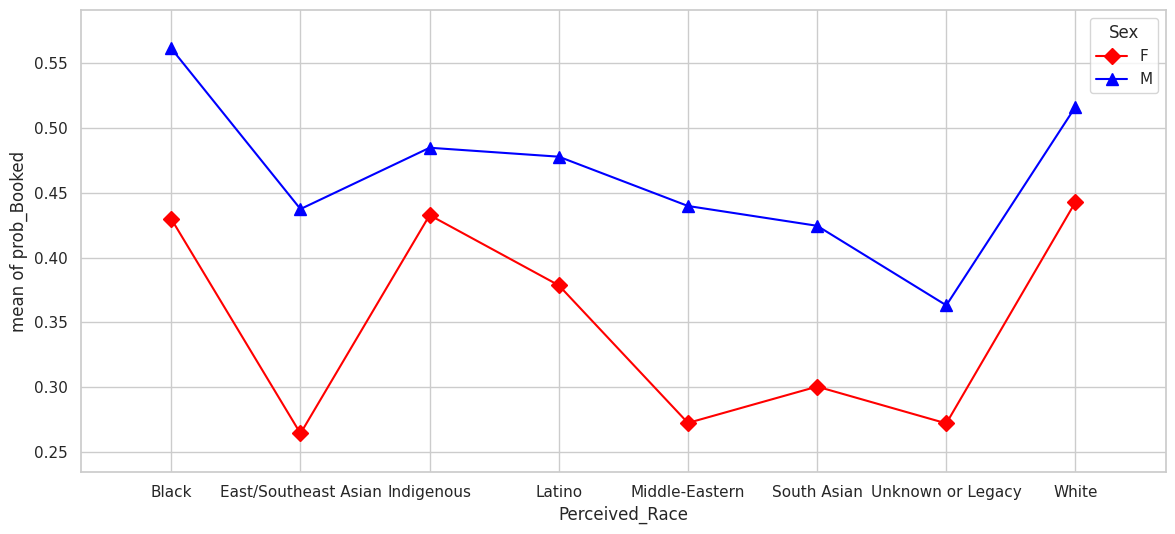

In [64]:
#Interaction Plot for 2-Way ANOVA
#set figure size
fig, ax = plt.subplots(figsize=(14, 6))

fig = interaction_plot(
    x=df['Perceived_Race'],                 
    trace=df['Sex'],            
    response=df['prob_Booked'],         
    colors=["red", "blue"],
    markers=["D", "^"],
    ms=8,
    ax=ax,
)

####Post-hoc Tukey HSD Test - for 2-Way ANOVA

In [65]:
#Post-hoc Tukey HSD Test for 2-Way ANOVA - Probability of Booking & Perceived Race

tukeyRace = pairwise_tukeyhsd(endog=df['prob_Booked'].astype(float), groups=df['Perceived_Race'].astype(str), alpha=0.05)
print(tukeyRace)



              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1               group2        meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------
               Black East/Southeast Asian  -0.1304    0.0 -0.1505 -0.1104   True
               Black           Indigenous  -0.0709    0.0 -0.0994 -0.0423   True
               Black               Latino  -0.0757    0.0 -0.1054  -0.046   True
               Black       Middle-Eastern  -0.1177    0.0 -0.1404 -0.0949   True
               Black          South Asian  -0.1316    0.0 -0.1534 -0.1099   True
               Black    Unknown or Legacy  -0.1922    0.0 -0.2112 -0.1732   True
               Black                White  -0.0387    0.0 -0.0502 -0.0272   True
East/Southeast Asian           Indigenous   0.0596    0.0  0.0271   0.092   True
East/Southeast Asian               Latino   0.0548    0.0  0.0213  0.0883   True
East/Southeast Asian       M

In [66]:
#Post-hoc Tukey HSD Test for 2-Way ANOVA - Probability of Booking & Sex/Gender

tukeyGender = pairwise_tukeyhsd(endog=df['prob_Booked'], groups=df['Sex'], alpha=0.05)
print(tukeyGender)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     F      M   0.0956   0.0 0.0879 0.1033   True
-------------------------------------------------


In [67]:
#Post-hoc Tukey HSD Test for 2-Way ANOVA - Interaction (Race & Gender/Sex)
#Combine 2 explanatory variables for interaction
df['combination'] = df.Perceived_Race + " / " + df.Sex

#Tukey HSD Test for interaction
interactionTukey = pairwise_tukeyhsd(endog=df['prob_Booked'], groups=df['combination'], alpha=0.05)
print(interactionTukey)

                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
         group1                   group2          meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------------
               Black / F                Black / M   0.1315    0.0  0.1047  0.1583   True
               Black / F East/Southeast Asian / F  -0.1654    0.0 -0.2201 -0.1107   True
               Black / F East/Southeast Asian / M   0.0077    1.0 -0.0252  0.0406  False
               Black / F           Indigenous / F    0.003    1.0 -0.0557  0.0616  False
               Black / F           Indigenous / M    0.055 0.0023  0.0106  0.0993   True
               Black / F               Latino / F  -0.0512 0.8019  -0.137  0.0347  False
               Black / F               Latino / M   0.0481 0.0095  0.0058  0.0903   True
               Black / F       Middle-Eastern / F  -0.1573    0.0 -0.2315  -0.083   True
               Black 

####1-Way ANOVA 

In [68]:
#1-way ANOVA for effects of race on probability of being strip searched due to suspected weapon possession
model = ols('prob_WeaponSearch ~ C(Perceived_Race)', data=df).fit()
sm.stats.anova_lm(model, typ=2)


,sum_sq,df,F,PR(>F)
C(Perceived_Race),110.815393,7.0,194.066788,3.790043e-286
Residual,5323.426328,65259.0,NaN,NaN


####Post-hoc Tukey HSD Test - for 1-Way ANOVA

In [69]:
#Post-hoc Tukey HSD Test for 1-Way ANOVA - Probability of Weapon Search & Race

tukeyWeaponRace = pairwise_tukeyhsd(endog=df['prob_WeaponSearch'], groups=df['Perceived_Race'], alpha=0.05)
print(tukeyWeaponRace)

              Multiple Comparison of Means - Tukey HSD, FWER=0.05               
       group1               group2        meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------
               Black East/Southeast Asian  -0.0959    0.0 -0.1104 -0.0813   True
               Black           Indigenous   0.0316 0.0001  0.0109  0.0524   True
               Black               Latino  -0.0774    0.0  -0.099 -0.0558   True
               Black       Middle-Eastern  -0.0913    0.0 -0.1079 -0.0747   True
               Black          South Asian  -0.1005    0.0 -0.1163 -0.0846   True
               Black    Unknown or Legacy  -0.1016    0.0 -0.1154 -0.0878   True
               Black                White  -0.0124 0.0002 -0.0207  -0.004   True
East/Southeast Asian           Indigenous   0.1275    0.0  0.1039  0.1511   True
East/Southeast Asian               Latino   0.0184 0.2979 -0.0059  0.0428  False
East/Southeast Asian       M

# Final Project Codes (contain only additional ones)

### Create continuous variables (prob_arrest_action_cooperative & prob_strip_search):

In [70]:
df['Actions_at_arrest___Cooperative'].value_counts()

0    36161
1    29106
Name: Actions_at_arrest___Cooperative, dtype: int64

In [71]:
# Create prob_arrest_action_cooperative:

# Group the DataFrame by PersonID and calculate the sum of Actions_at_arrest___Cooperative
grouped = df.groupby(['PersonID'])['Actions_at_arrest___Cooperative'].sum().reset_index()

# Count the number of rows for each PersonID
cooperative_count = df.groupby('PersonID')['Actions_at_arrest___Cooperative'].count().reset_index()
cooperative_count.columns = ['PersonID', 'cooperative_count']

# Merge the two DataFrames
grouped = pd.merge(grouped, cooperative_count, on='PersonID')

# Calculate Y
grouped['prob_arrest_action_cooperative'] = grouped['Actions_at_arrest___Cooperative'] / grouped['cooperative_count']

# Replace missing values with 0
grouped['prob_arrest_action_cooperative'] = grouped['prob_arrest_action_cooperative'].fillna(0)

# Merge Y back into the original DataFrame
df = pd.merge(df, grouped[['PersonID', 'prob_arrest_action_cooperative']], on='PersonID', how='left')
df

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId,prob_Booked,prob_WeaponSearch,combination,prob_arrest_action_cooperative
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1,0.666667,0.0,White / M,0.333333
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2,0.666667,0.0,White / M,0.333333
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3,0.333333,0.0,Unknown or Legacy / M,0.333333
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4,0.000000,0.0,Black / M,0.333333
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5,0.666667,0.0,South Asian / M,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65262,2021,Oct-Dec,1055609,6044336.0,316123,Indigenous,F,Aged 25 to 34 years,Not a youth,XX,0,0,Vehicle Related,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,65272,0.000000,0.0,Indigenous / F,0.000000
65263,2021,Oct-Dec,1032758,6031692.0,307736,South Asian,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,65273,1.000000,0.0,South Asian / M,0.000000
65264,2021,Oct-Dec,1021067,6064396.0,324057,White,F,Aged 45 to 54 years,Not a youth,XX,0,0,Assault,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,65274,0.000000,0.0,White / F,0.000000
65265,2021,Oct-Dec,1008998,6008662.0,331870,Unknown or Legacy,M,Aged 17 years and younger,Youth (aged 17 and younger),XX,0,0,Robbery/Theft,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,65275,0.000000,0.0,Unknown or Legacy / M,1.000000


In [72]:
df['StripSearch'].value_counts()

0    57466
1     7801
Name: StripSearch, dtype: int64

In [73]:
# Create prob_strip_search:

# Group the DataFrame by PersonID and calculate the sum of Actions_at_arrest___Cooperative
grouped = df.groupby(['PersonID'])['StripSearch'].sum().reset_index()

# Count the number of rows for each PersonID
StripSearch_count = df.groupby('PersonID')['StripSearch'].count().reset_index()
StripSearch_count.columns = ['PersonID', 'StripSearch_count']

# Merge the two DataFrames
grouped = pd.merge(grouped, StripSearch_count, on='PersonID')

# Calculate Y
grouped['prob_strip_search'] = grouped['StripSearch'] / grouped['StripSearch_count']

# Replace missing values with 0
grouped['prob_strip_search'] = grouped['prob_strip_search'].fillna(0)

# Merge Y back into the original DataFrame
df = pd.merge(df, grouped[['PersonID', 'prob_strip_search']], on='PersonID', how='left')
df

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Actions_at_arrest___Concealed_i,Actions_at_arrest___Combative__,Actions_at_arrest___Resisted__d,Actions_at_arrest___Mental_inst,Actions_at_arrest___Assaulted_o,Actions_at_arrest___Cooperative,SearchReason_CauseInjury,SearchReason_AssistEscape,SearchReason_PossessWeapons,SearchReason_PossessEvidence,ItemsFound,ObjectId,prob_Booked,prob_WeaponSearch,combination,prob_arrest_action_cooperative,prob_strip_search
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,1,0.666667,0.0,White / M,0.333333,0.0
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,2,0.666667,0.0,White / M,0.333333,0.0
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,3,0.333333,0.0,Unknown or Legacy / M,0.333333,0.0
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,4,0.000000,0.0,Black / M,0.333333,0.0
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,5,0.666667,0.0,South Asian / M,0.333333,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65262,2021,Oct-Dec,1055609,6044336.0,316123,Indigenous,F,Aged 25 to 34 years,Not a youth,XX,0,0,Vehicle Related,0,0,1,0,0,0,NaN,NaN,NaN,NaN,NaN,65272,0.000000,0.0,Indigenous / F,0.000000,0.0
65263,2021,Oct-Dec,1032758,6031692.0,307736,South Asian,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,65273,1.000000,0.0,South Asian / M,0.000000,0.0
65264,2021,Oct-Dec,1021067,6064396.0,324057,White,F,Aged 45 to 54 years,Not a youth,XX,0,0,Assault,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,65274,0.000000,0.0,White / F,0.000000,0.0
65265,2021,Oct-Dec,1008998,6008662.0,331870,Unknown or Legacy,M,Aged 17 years and younger,Youth (aged 17 and younger),XX,0,0,Robbery/Theft,0,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,65275,0.000000,0.0,Unknown or Legacy / M,1.000000,0.0


## EDA

In [74]:
df['Actions_at_arrest___Cooperative'].value_counts()

0    36161
1    29106
Name: Actions_at_arrest___Cooperative, dtype: int64

In [75]:
# Contingency table (Perceived_Race and Strip Search):

pd.crosstab(df['Perceived_Race'], df['StripSearch'])

StripSearch,0,1
Perceived_Race,,
Black,15092,2434
East/Southeast Asian,4074,341
Indigenous,1628,306
Latino,1635,132
Middle-Eastern,3009,228
South Asian,3356,257
Unknown or Legacy,4520,537
White,24152,3566


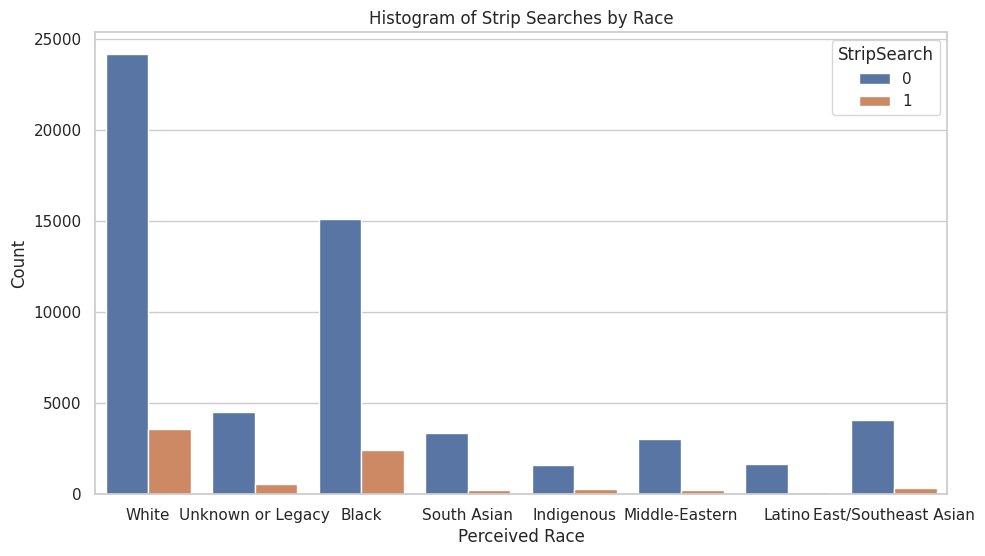

In [76]:
# Histogram (Perceived_Race and Strip Search):

plt.figure(figsize=(11,6))

# Create a histogram-like plot using seaborn
sns.countplot(data=df, x="Perceived_Race", hue="StripSearch")

# Add axis labels and a title
plt.xlabel("Perceived Race")
plt.ylabel("Count")
plt.title("Histogram of Strip Searches by Race")

# Display the plot
plt.show()

In [77]:
df['prob_arrest_action_cooperative'].value_counts()

0.000000    19722
1.000000    16208
0.500000     7732
0.333333     3516
0.666667     2496
            ...  
0.692308       13
0.076923       13
0.818182       11
0.900000       10
0.875000        8
Name: prob_arrest_action_cooperative, Length: 119, dtype: int64

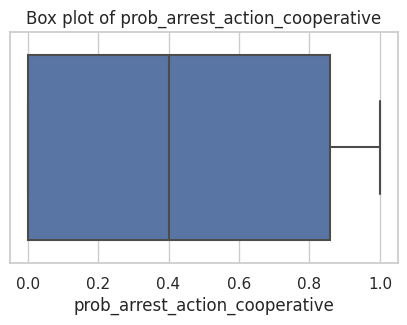

In [78]:
# Box plot (prob_arrest_action_cooperative):

import seaborn as sns

plt.figure(figsize=(5,3))
sns.boxplot(x='prob_arrest_action_cooperative', data=df)

# Add a title to the plot
plt.title('Box plot of prob_arrest_action_cooperative')

# Show the plot
plt.show()

## T-tests

In [79]:
# Normality check (prob_strip_search):

from scipy.stats import shapiro

# Perform Shapiro-Wilk test on a sample
stat, p = shapiro(df['prob_strip_search'])
print("Stat", stat, "p_value: ", p)

# Interpret the results
alpha = 0.05
if p > alpha:
    print("Sample is normally distributed")
else:
    print("Sample is not normally distributed")

Stat 0.579416036605835 p_value:  0.0
Sample is not normally distributed


/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


#### - Race (Perceived_Race) and prob_strip_search (probability of being strip searched)

In [80]:
# H0: The population means of the probabilities of being strip searched for white and non-white people are equal.
# HA: The population means of the probabilities of being strip searched for white and non-white people are not equal.

In [81]:
df['Perceived_Race'].value_counts()

White                   27718
Black                   17526
Unknown or Legacy        5057
East/Southeast Asian     4415
South Asian              3613
Middle-Eastern           3237
Indigenous               1934
Latino                   1767
Name: Perceived_Race, dtype: int64

In [82]:
# subset the data for the two groups
strip_race_white = df[df['Perceived_Race'] == 'White']['prob_strip_search']
strip_race_non_white = df[df['Perceived_Race'] != 'White']['prob_strip_search']

# conduct t-test
t, p = ttest_ind(strip_race_white, strip_race_non_white, equal_var=False)

# print results
print('t-statistic:', t)
print('p-value:', p)

t-statistic: 8.560976152543477
p-value: 1.1451132400160702e-17


In [83]:
# Calculate mean and standard deviation of groups 

print('Mean probabilities of being strip searched for Race, White, Non-White:',strip_race_white.mean(), strip_race_non_white.mean())
print('Standard deviation of being strip searched for Race, White, Non-White:',strip_race_white.std(), strip_race_non_white.std())

Mean probabilities of being strip searched for Race, White, Non-White: 0.1286630243839816 0.11277845721922815
Standard deviation of being strip searched for Race, White, Non-White: 0.2330980804868267 0.23593499803471615


In [84]:
# Confidence level

import statsmodels.stats.api as sms
cm = sms.CompareMeans(sms.DescrStatsW(strip_race_white), sms.DescrStatsW(strip_race_non_white))
print('Confidence interval:',cm.tconfint_diff(usevar='unequal'))

Confidence interval: (0.012247854963685592, 0.01952127936582128)


##### The results indicate that the mean probabilities of being strip searched for white (M=0.13, SD=0.11) people is lower than the mean probability of being strip searched for non-white (M=0.23, SD=0.24) people. With alpha established at 0.05, this is a statistically significant difference as the p-value (1.1451132400160702e-17) is less than 0.05, 95% CI [0.01, 0.02]. Therefore, we can reject the null hypothesis and conclude that there is a significant difference in the mean probabilities of being strip searched for white and non-white people.

## Power Analysis

In [85]:
#Cohen's D Calculation

#function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(sample1,sample2):
    #calculate the sample size
    n1, n2 = len(sample1), len(sample2)
    #calculate the variances
    var1, var2 = np.var(sample1, ddof=1), np.var(sample2, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

# function to calculate Cohen's d for independent samples
def Cohens_d(sample1, sample2):
    u1, u2 = np.mean(sample1), np.mean(sample2)
    s_pooled = pooled_standard_deviation(sample1, sample2)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

In [86]:
#creating 2 new datasets one with race = white and one with race = non white
White_race = df[df['Perceived_Race']=='White']
NonWhite_race = df[df['Perceived_Race']!='White']

#isolate probability of being strip searched for each sample
WRace_probStrip = White_race['prob_strip_search']
NonWRace_probStrip = NonWhite_race['prob_strip_search']

In [87]:
#calculate effect size, sample size
from statsmodels.stats.power import TTestIndPower

effect_size = Cohens_d(WRace_probStrip,NonWRace_probStrip)
alpha = 0.05
power = 0.8
ratio_ =len(WRace_probStrip)/len(NonWRace_probStrip) 

print('Effect size (Cohen\'s D) for probability of being strip searched:', effect_size)

Effect size (Cohen's D) for probability of being strip searched: 0.0676703867390866


In [88]:
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for WRace_probStrip') 
print('Actual size of WRace_probStrip:', len(WRace_probStrip))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for NonWRace_probStrip')
print('Actual size of NonWRace_probStrip:', len(NonWRace_probStrip))

Sample Size of nobs1: 4037.011 needed for WRace_probStrip
Actual size of WRace_probStrip: 27718
Sample Size of nobs2: 2980.050 needed for NonWRace_probStrip
Actual size of NonWRace_probStrip: 37549


## ANCOVA

### 1. Check assumptions:

In [89]:
# Normality of outcome (prob_strip_search):

from scipy.stats import shapiro

# Perform Shapiro-Wilk test on a sample
stat, p = shapiro(df['prob_strip_search'])
print("Stat", stat, "p_value: ", p)

# Interpret the results
alpha = 0.05
if p > alpha:
    print("Sample is normally distributed")
else:
    print("Sample is not normally distributed")

Stat 0.579416036605835 p_value:  0.0
Sample is not normally distributed


/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [90]:
# Normality of continuous independent variable (prob_arrest_action_cooperative):

from scipy.stats import shapiro

# Perform Shapiro-Wilk test on a sample
stat, p = shapiro(df['prob_arrest_action_cooperative'])
print("Stat", stat, "p_value: ", p)

# Interpret the results
alpha = 0.05
if p > alpha:
    print("Sample is normally distributed")
else:
    print("Sample is not normally distributed")

Stat 0.8488974571228027 p_value:  0.0
Sample is not normally distributed


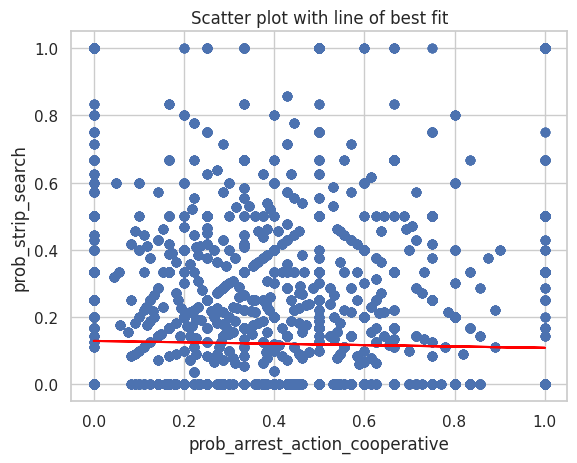

In [91]:
# Linearity (outcome and covariate):

import matplotlib.pyplot as plt
import numpy as np

# Define your dependent variable
y = df['prob_strip_search']

# Define your independent variable
x = df['prob_arrest_action_cooperative']

# Calculate the slope and intercept of the line of best fit
m, b = np.polyfit(x, y, 1)

# Create a scatter plot
plt.scatter(x, y)

# Plot the line of best fit
plt.plot(x, m*x + b, color='red')

# Add axis labels and a title
plt.xlabel('prob_arrest_action_cooperative')
plt.ylabel('prob_strip_search')
plt.title('Scatter plot with line of best fit')

# Show the plot
plt.show()

In [92]:
# Constant variance:

from scipy.stats import levene

White = df[df['Perceived_Race']=='White']['prob_strip_search']
Unknown_or_Legacy = df[df['Perceived_Race']=='Unknown or Legacy']['prob_strip_search']
Black = df[df['Perceived_Race']=='Black']['prob_strip_search']
South_Asian = df[df['Perceived_Race']=='South Asian']['prob_strip_search']
Indigenous = df[df['Perceived_Race']=='Indigenous']['prob_strip_search']
Middle_Eastern = df[df['Perceived_Race']=='Middle-Eastern']['prob_strip_search']
Latino = df[df['Perceived_Race']=='Latino']['prob_strip_search']
East_Southeast_Asian = df[df['Perceived_Race']=='East/Southeast Asian']['prob_strip_search']

stat, p_value = levene(White, Unknown_or_Legacy, Black, South_Asian, Indigenous, Middle_Eastern, Latino, East_Southeast_Asian)

print(f"Lavene's test statistic: {stat}")
print(f"P-value: {p_value}")

Lavene's test statistic: 106.98699053378354
P-value: 1.603373457872695e-156


In [93]:
# Homogeneity of within-group regression slopes:

import plotly.express as px

fig = px.scatter(df, x="prob_arrest_action_cooperative", y="prob_strip_search", color="Perceived_Race", trendline="ols")
fig.show()

### 2. Run one-way ANCOVA:

In [94]:
!pip install pingouin #if not installed on your virtual env then pip install 

import pandas as pd
from pingouin import ancova

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.6/198.6 kB 5.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=689fe3477134b5e7e6561e680c0b7a9085c5bb77fab66def8c8bcbf6bdb6588f
  Stored in directory: /root/.cache/pip/wheels/04/bb/0d/2d02ec45f29c48d6192476bfb59c5a0e64b605e7212374dd15
Successfully built littleutils


In [95]:
df['Perceived_Race'].unique() # Race is a categorical independent (x_1) variable 

array(['White', 'Unknown or Legacy', 'Black', 'South Asian', 'Indigenous',
       'Middle-Eastern', 'Latino', 'East/Southeast Asian'], dtype=object)

In [96]:
df['prob_arrest_action_cooperative'].unique() # Arrest action is a continuous independent (x_2) variable 

array([0.33333333, 0.57142857, 0.        , 0.625     , 1.        ,
       0.5       , 0.22727273, 0.16666667, 0.375     , 0.25      ,
       0.2       , 0.75      , 0.66666667, 0.125     , 0.6       ,
       0.4       , 0.28571429, 0.4375    , 0.09090909, 0.54545455,
       0.42857143, 0.14285714, 0.55555556, 0.71428571, 0.35      ,
       0.8       , 0.44444444, 0.30769231, 0.3       , 0.45454545,
       0.22222222, 0.34782609, 0.26666667, 0.85714286, 0.23076923,
       0.83333333, 0.46666667, 0.35294118, 0.27272727, 0.36363636,
       0.29268293, 0.2173913 , 0.52941176, 0.15384615, 0.39130435,
       0.38461538, 0.17391304, 0.61538462, 0.13043478, 0.46153846,
       0.13333333, 0.45      , 0.41666667, 0.1       , 0.875     ,
       0.40909091, 0.1875    , 0.18181818, 0.7       , 0.52380952,
       0.70588235, 0.53846154, 0.35714286, 0.77777778, 0.29411765,
       0.64285714, 0.26086957, 0.11764706, 0.3125    , 0.38095238,
       0.73333333, 0.28      , 0.11111111, 0.47058824, 0.88888

In [97]:
df['prob_strip_search'].unique() # Strip search is a continuous outcome (y)

array([0.        , 0.14285714, 0.25      , 1.        , 0.13636364,
       0.33333333, 0.5       , 0.4375    , 0.75      , 0.125     ,
       0.66666667, 0.2       , 0.09090909, 0.4       , 0.35714286,
       0.11111111, 0.28571429, 0.08333333, 0.16666667, 0.15      ,
       0.6       , 0.375     , 0.22222222, 0.1875    , 0.23076923,
       0.07142857, 0.42857143, 0.58333333, 0.27272727, 0.3       ,
       0.71428571, 0.46428571, 0.2173913 , 0.06666667, 0.17647059,
       0.17073171, 0.17391304, 0.22727273, 0.52941176, 0.26086957,
       0.38461538, 0.39130435, 0.07692308, 0.57142857, 0.45454545,
       0.625     , 0.30769231, 0.18181818, 0.36363636, 0.15384615,
       0.8       , 0.41666667, 0.3125    , 0.12      , 0.1       ,
       0.47058824, 0.85714286, 0.21428571, 0.29411765, 0.44444444,
       0.55555556, 0.0625    , 0.23809524, 0.13333333, 0.23529412,
       0.52173913, 0.58823529, 0.41176471, 0.47619048, 0.83333333,
       0.22580645, 0.35294118, 0.26666667, 0.53846154, 0.77777

In [98]:
# Isolate columns of interest into a new df:

df1 = df[['Perceived_Race', 'prob_arrest_action_cooperative', 'prob_strip_search']].copy()
df1.head()

,Perceived_Race,prob_arrest_action_cooperative,prob_strip_search
0,White,0.333333,0.0
1,White,0.333333,0.0
2,Unknown or Legacy,0.333333,0.0
3,Black,0.333333,0.0
4,South Asian,0.333333,0.0


In [99]:
# Inspect the data is stored correctly in the df:

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65267 entries, 0 to 65266
Data columns (total 3 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Perceived_Race                  65267 non-null  object 
 1   prob_arrest_action_cooperative  65267 non-null  float64
 2   prob_strip_search               65267 non-null  float64
dtypes: float64(2), object(1)
memory usage: 2.0+ MB


Null hypothesis: People from all perceived racial groups have the same probability of being strip searched on average after accounting for the probability of their arrest action as cooperative.

In [100]:
ancova(data=df1, dv='prob_strip_search', covar='prob_arrest_action_cooperative', between='Perceived_Race')

,Source,SS,DF,F,p-unc,np2
0,Perceived_Race,39.567086,7,103.719084,1.212401e-151,0.011003
1,prob_arrest_action_cooperative,2.890023,1,53.030280,3.321353e-13,0.000812
2,Residual,3556.404182,65258,NaN,NaN,NaN


### 3. Result interpretation:

The p-unc = “uncorrected p-value” for Perceived_Race is less than 0.05. We can reject the null hypothesis that people from all perceived racial groups have the same probability of being strip searched on average after accounting for the probability of their arrest action as cooperative.


## Logistic Regression Model

### Feature Selection & Encoding

In [101]:
#select categorical variables 
x = df[['Perceived_Race', 'Sex']].copy()

#encode categorical features, drop specific columns as the reference instead of the first ones by default
x = pd.get_dummies(data=x, columns=['Perceived_Race', 'Sex']).drop(['Perceived_Race_White', 'Sex_F'], axis=1)

#change format 
x.rename(columns={"Perceived_Race_East/Southeast Asian": "Perceived_Race_East_Southeast_Asian"}, inplace=True)
x.rename(columns={"Perceived_Race_South Asian": "Perceived_Race_South_Asian"}, inplace=True)
x.rename(columns={"Perceived_Race_Middle-Eastern": "Perceived_Race_Middle_Eastern"}, inplace=True)
x.rename(columns={"Perceived_Race_Unknown or Legacy": "Perceived_Race_Unknown_or_Legacy"}, inplace=True)

#merging east/southeast asian and south asian categories into one category/column
x['Perceived_Race_Asian'] = x.apply(lambda x: 1 if x['Perceived_Race_East_Southeast_Asian']==1 or x['Perceived_Race_South_Asian']==1 else 0, axis=1)
x = x.drop(['Perceived_Race_East_Southeast_Asian', 'Perceived_Race_South_Asian'], axis=1)

x

#select outcome variable
y = df['Booked'].copy()
#y

### Train Test Split

In [102]:
#split data into test and training sets
#set random state to ensure replicability 
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=123)

### Training Model

In [103]:
#create formula (string)
formula = 'Booked ~ Perceived_Race_Black + Perceived_Race_Indigenous + Perceived_Race_Latino + Perceived_Race_Middle_Eastern + Perceived_Race_Asian + Perceived_Race_Unknown_or_Legacy + Sex_M' 
print("Formula: ", formula, "\n")
#Perceived_Race_White + Sex_F -  dropped columns

#merge training exploratory variables and outcome variable into 1 dataframe
trainingData = pd.concat([x_train,y_train], axis = 1)

#train model
log_reg_model = smf.logit(formula, data=trainingData).fit()

Formula:  Booked ~ Perceived_Race_Black + Perceived_Race_Indigenous + Perceived_Race_Latino + Perceived_Race_Middle_Eastern + Perceived_Race_Asian + Perceived_Race_Unknown_or_Legacy + Sex_M 

Optimization terminated successfully.
         Current function value: 0.686277
         Iterations 4


In [104]:
#get log regression results
log_reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Booked   No. Observations:                52213
Model:                          Logit   Df Residuals:                    52205
Method:                           MLE   Df Model:                            7
Date:                Mon, 17 Apr 2023   Pseudo R-squ.:                0.007475
Time:                        01:00:55   Log-Likelihood:                -35833.
converged:                       True   LL-Null:                       -36102.
Covariance Type:            nonrobust   LLR p-value:                2.301e-112
====================================================================================================
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           -0.2449      0.022    -11.091      0.000      -0.288      -0.202
Perceived_Race_Black                 0.1260      0.022      5.778      0.000       0.083       0.169
Perceived_Race_Indigenous            0.1838      0.053      3.449      0.001       0.079       0.288
Perceived_Race_Latino                0.0540      0.056      0.971      0.332      -0.055       0.163
Perceived_Race_Middle_Eastern       -0.0899      0.042     -2.164      0.030      -0.171      -0.008
Perceived_Race_Asian                -0.1838      0.028     -6.457      0.000      -0.240      -0.128
Perceived_Race_Unknown_or_Legacy    -0.1539      0.034     -4.465      0.000      -0.221      -0.086
Sex_M                                0.4471      0.022     19.920      0.000       0.403       0.491
====================================================================================================
"""

### Getting Odds Ratios

In [105]:
#get coefficients from model results
params = log_reg_model.params

#get confidence intervals
confInterval = log_reg_model.conf_int()
#add coefficients to confidence interval table
confInterval['Odds Ratio'] = params
#assign column names to table
confInterval.columns = ["Lower CI", "Upper CI", "Odds Ratio"]

#take exponent of results
np.exp(confInterval)

,Lower CI,Upper CI,Odds Ratio
Intercept,0.749620,0.817396,0.782775
Perceived_Race_Black,1.086797,1.183740,1.134233
Perceived_Race_Indigenous,1.082606,1.334137,1.201809
Perceived_Race_Latino,0.946521,1.176889,1.055439
Perceived_Race_Middle_Eastern,0.842553,0.991568,0.914029
Perceived_Race_Asian,0.786980,0.879863,0.832127
Perceived_Race_Unknown_or_Legacy,0.801322,0.917269,0.857338
Sex_M,1.496429,1.634046,1.563724


### Model Evaluation

In [106]:
#get predicted y values
prediction = log_reg_model.predict(x_test)

#round prediction values to nearest integer
prediction_rounded = list(map(round, prediction))

Accuracy Score

In [107]:
#get accuracy score from predicted values
print('Accuracy Score = ', accuracy_score(y_test, prediction_rounded))

Accuracy Score =  0.5451968745212196


Confusion Matrix

In [108]:
#get confusion matrix

conf_matrix = confusion_matrix(y_test, prediction_rounded) 
print ("Confusion Matrix : \n", conf_matrix) 

Confusion Matrix : 
 [[1384 4818]
 [1119 5733]]
